In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read file 
df_std = pd.read_csv('csv_files/no_skewx2.csv', index_col=0)
df_std.head()


,C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,...,S3,C3p,C5p,C6p,LongSentences,RealWords,LongWords,PositiveWords,NegativeWords,UncertainWords
0,2.227033,1.0,1.228049,0.029074,17.528157,16.176365,1.927893,21.679483,112.778544,107.517440,...,2.275984,1,1.351792,1.493802,0.640426,0.646515,0.615270,0.169556,0.209529,0.221915
1,2.524740,0.0,NaN,-0.013352,17.178286,14.690979,1.720483,28.124722,147.621137,139.946418,...,2.487662,0,2.487306,0.000000,0.644753,0.641182,0.609752,0.148247,0.223103,0.221556
2,2.116933,1.0,NaN,0.020715,16.639604,15.424948,1.395264,14.177447,72.539644,69.173694,...,1.978602,0,1.214656,0.000000,0.636816,0.646763,0.628717,0.226322,0.184411,0.225078
3,2.436077,1.0,NaN,0.020023,16.513419,15.319588,1.429303,18.110770,90.879040,87.028731,...,2.188931,0,1.193831,0.000000,0.539634,0.650793,0.628490,0.213167,0.192593,0.237040
4,2.075782,1.0,0.641972,-0.034895,17.241131,15.925724,2.929681,23.916521,121.778487,114.786759,...,2.346674,1,1.315407,1.307660,0.587413,0.635767,0.603993,0.165315,0.215782,0.224143


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff189b134e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff189b13b70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff189b13390>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff187591240>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff187591588>],
 'means': []}

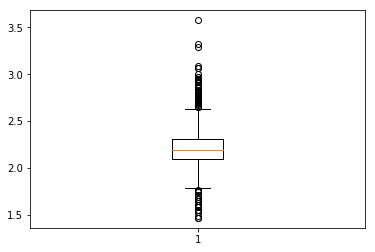

In [55]:
plt.boxplot(df_std['C1'])

In [56]:
df_binary = df_std.loc[:,['C2', 'C3p']]

In [14]:
my_col = df_std[['C1']]
my_col.head()
u_bound = my_col.mean() + 3*my_col.std()
l_bound = my_col.mean() - 3*my_col.std()

outlier = (my_col > u_bound) | (my_col < l_bound)
print(outlier.C1.value_counts())

False    673
True       9
Name: C1, dtype: int64


In [44]:
df_binary.head()

,C2,C3p
0,1.0,1
1,0.0,0
2,1.0,0
3,1.0,0
4,1.0,1


In [45]:
df_std = df_std.drop(labels = 'C2', axis =1)

In [46]:
    col_value = df_std[col]
    col_mean = df_std[col].mean()
    col_std = df_std[col].std()

In [47]:
upper_std_dev = []
lower_std_dev = []

for i in df_std.columns:
    
    col_mean = df_std[i].mean() 
    col_std = df_std[i].std()
    top = col_mean + col_std*3
    bottom = col_mean - col_std*3
    
    upper_std_dev.append(top)
    lower_std_dev.append(bottom)
    

In [49]:
def std_outlier_handling(x, top, bottom):
    if x > top:
        x = top
    elif x < bottom:
        x = bottom
    else:    
        pass
    return x

In [50]:
for col in df_std.columns:
#    u_std = df_std.loc[:,col]
#    l_std = df_std.loc[:,col]
    
    upper = top
    lower = bottom
    
    df_std.loc[:, col] = df_std.loc[:, col].apply(lambda x: std_outlier_handling(x, upper, lower))

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff187644128>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff187644908>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff1876441d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff187644f98>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff18764c320>],
 'means': []}

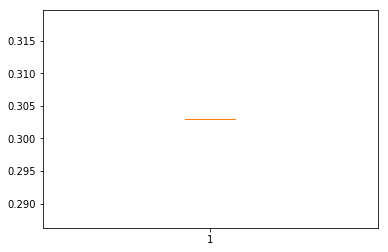

In [51]:
plt.boxplot(df_std['C1'])

In [52]:
#(df.c > x1) or (df.c < x2)
# if (df.c > x1):
    #df[(df.c > x1)] = x1